<a href="https://colab.research.google.com/github/Shankar-Hadimani/1000_test/blob/master/notebooks/timeseries/Timeseries_Decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Timeseries Decomposition

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime
import os


In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/amazon_revenue_profit.csv')
df.head()

,Quarter,Revenue,Net Income
0,3/31/2020,75452,2535
1,12/31/2019,87437,3268
2,9/30/2019,69981,2134
3,6/30/2019,63404,2625
4,3/31/2019,59700,3561


In [7]:
def convert_to_datetime(x):
  return datetime.strptime(x, '%m/%d/%Y')

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/amazon_revenue_profit.csv', parse_dates=['Quarter'], date_parser=convert_to_datetime)
df.head()

,Quarter,Revenue,Net Income
0,2020-03-31,75452,2535
1,2019-12-31,87437,3268
2,2019-09-30,69981,2134
3,2019-06-30,63404,2625
4,2019-03-31,59700,3561


In [14]:
amazon_df = df.set_index('Quarter')
amazon_df.head()

,Revenue,Net Income
Quarter,,
2020-03-31,75452,2535
2019-12-31,87437,3268
2019-09-30,69981,2134
2019-06-30,63404,2625
2019-03-31,59700,3561


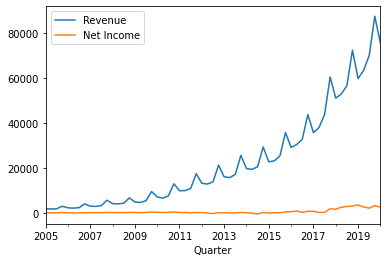

In [15]:
amazon_df.plot()

In [19]:
fig = px.line(df, x='Quarter', y='Revenue', title='Amazon Revenue')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
                      dict(count=1, label="1Yr", step='year', stepmode='backward'),
                      dict(count=2, label="3Yr", step='year', stepmode='backward'),
                      dict(count=3, label="5Yr", step='year', stepmode='backward'),
                      dict(step='all')
        ])
    )
)
fig.show()

####**KPSS** - Kwiatkowski-Philips-Schmidt-Shin Stastical Test :
1.   NULL Hypothesis : Timeseries is Stationary
2.   Alternate Hypothesis : Timeseries is NOT Stationary




In [26]:
from statsmodels.tsa.stattools import kpss

ts_kpss_test = kpss(amazon_df['Revenue'], 'ct')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'



In [27]:
ts_kpss_test

(0.170051682108309,
 0.029956931576409152,
 11,
 {'1%': 0.216, '10%': 0.119, '2.5%': 0.176, '5%': 0.146})

In [28]:
stats, p, lags, critical_values = ts_kpss_test

In [37]:
print(stats)
print( p)
print( lags) 
print(critical_values)

0.170051682108309
0.029956931576409152
11
{'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}


**Additive** - ![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/ec813268e453864276769e12a207c653f0ef67e6)

**Multiplicative** - ![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/b3849db82617c2bd2cfe3dc5302496e6468020b9)

In [44]:
import statsmodels.api as sm
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

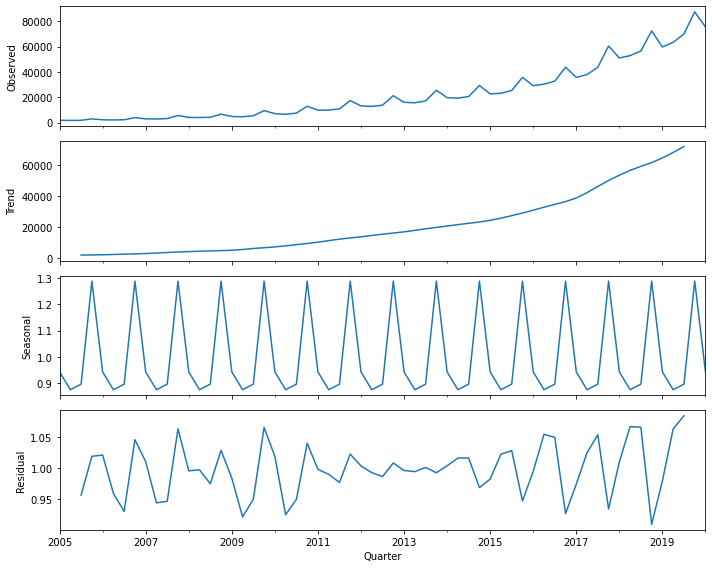

In [46]:
result = sm.tsa.seasonal_decompose(amazon_df['Revenue'], model='multiplicative')
output = result.plot()

Quarter
2020-03-31    75452
2019-12-31    87437
2019-09-30    69981
2019-06-30    63404
2019-03-31    59700
              ...  
2006-03-31     2279
2005-12-31     2977
2005-09-30     1858
2005-06-30     1753
2005-03-31     1902
Name: Revenue, Length: 61, dtype: int64


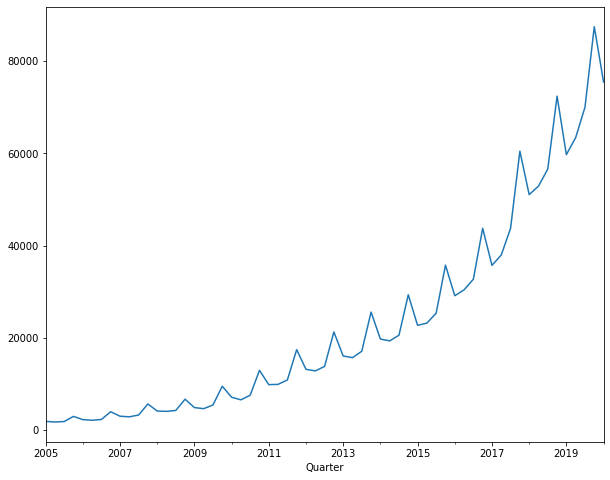

In [57]:
print(result.observed)
result.observed.plot()

Quarter
2020-03-31          NaN
2019-12-31          NaN
2019-09-30    72099.500
2019-06-30    68248.750
2019-03-31    64691.375
                ...    
2006-03-31     2369.375
2005-12-31     2265.000
2005-09-30     2169.625
2005-06-30          NaN
2005-03-31          NaN
Name: Revenue, Length: 61, dtype: float64


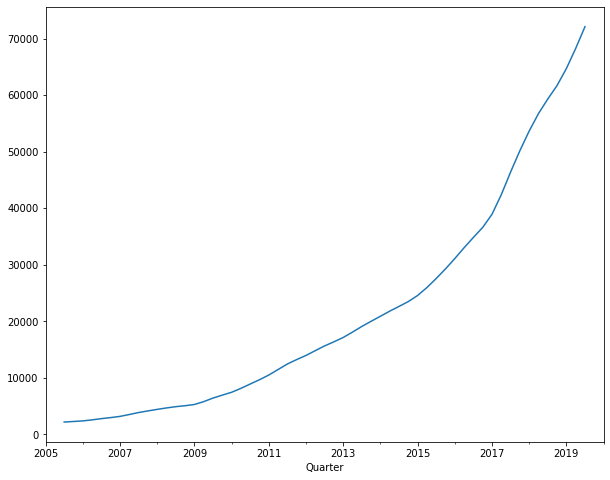

In [56]:
plt.figure(figsize=(10,8))
print(result.trend)
result.trend.plot()

Quarter
2020-03-31         NaN
2019-12-31         NaN
2019-09-30    1.084496
2019-06-30    1.063372
2019-03-31    0.979831
                ...   
2006-03-31    1.021253
2005-12-31    1.019256
2005-09-30    0.956844
2005-06-30         NaN
2005-03-31         NaN
Name: Revenue, Length: 61, dtype: float64


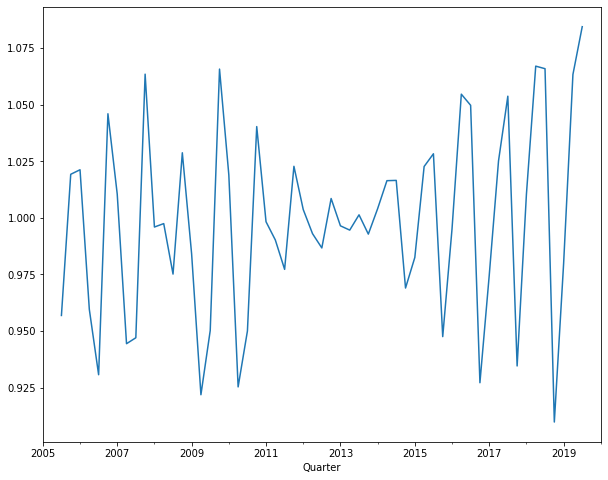

In [58]:
print(result.resid)
result.resid.plot()

Quarter
2020-03-31    0.941840
2019-12-31    1.289518
2019-09-30    0.894993
2019-06-30    0.873649
2019-03-31    0.941840
                ...   
2006-03-31    0.941840
2005-12-31    1.289518
2005-09-30    0.894993
2005-06-30    0.873649
2005-03-31    0.941840
Name: Revenue, Length: 61, dtype: float64


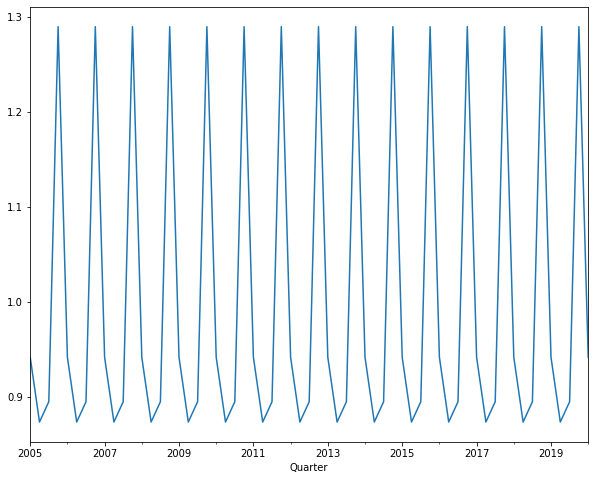

In [59]:
print(result.seasonal)
result.seasonal.plot()